In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## トレードデータの取得

In [2]:
EURUSD = pd.read_csv('D:\MixBollinger\EURUSD_220710~/MixBollinger_EURUSD.csv')

In [3]:
EURUSD.head()

,SystemDate,Date,DST,Week,OpenTime,CloseTime,OpenPrice,ClosePrice,Type,Profit,MaxProfit,Rate,MaxMinTime,LosCut,Spread,OpenTime(2),CenterTime
0,2010.01.04 10:36,2010.01.04,N,1,10:36,16:19,1.43799,1.44043,0,24.4,69.9,34.9,280,47.213813,1.4,2010/1/4 10:36,2010/1/5 9:04
1,2010.01.05 05:25,2010.01.05,N,2,5:25,9:02,1.44281,1.44404,0,12.3,54.9,22.4,156,14.173674,1.6,2010/1/5 5:25,2010/1/5 9:04
2,2010.01.05 12:05,2010.01.05,N,2,12:05,12:39,1.44097,1.44244,1,-14.7,8.8,-167.0,19,14.771980,1.3,2010/1/5 12:05,2010/1/5 12:39
3,2010.01.05 13:42,2010.01.05,N,2,13:42,14:38,1.44398,1.44258,0,-14.0,14.2,-98.6,5,14.891786,1.4,2010/1/5 13:42,2010/1/5 14:38
4,2010.01.05 15:01,2010.01.05,N,2,15:01,15:14,1.44108,1.44260,1,-15.2,3.6,-422.2,3,15.116385,1.3,2010/1/5 15:01,2010/1/5 15:14


In [4]:
EURUSD.dtypes

SystemDate      object
Date            object
DST             object
Week             int64
OpenTime        object
CloseTime       object
OpenPrice      float64
ClosePrice     float64
Type             int64
Profit         float64
MaxProfit      float64
Rate           float64
MaxMinTime       int64
LosCut         float64
Spread         float64
OpenTime(2)     object
CenterTime      object
dtype: object

## 相場タイプの取得

In [5]:
EURUSD_type = pd.read_excel('D:/07相場情報/相場情報_EURUSD.xlsx', sheet_name="分析", header=1, usecols="B:D,N:Q")

In [6]:
EURUSD_type.head()

,Date(Datetime),Date,Week,BeforeType,ExpansionType,AfterType,ExpnLineage
0,2010-01-01,2010.01.01,Fri,NaN,NaN,NaN,-
1,2010-01-04,2010.01.04,Mon,range,expansion,squeeze,expansion
2,2010-01-05,2010.01.05,Tue,squeeze,fake inverse expn,squeeze,expansion
3,2010-01-06,2010.01.06,Wed,squeeze,expansion,range,expansion
4,2010-01-07,2010.01.07,Thu,range,expansion,squeeze,expansion


In [7]:
EURUSD_type.dtypes

Date(Datetime)    datetime64[ns]
Date                      object
Week                      object
BeforeType                object
ExpansionType             object
AfterType                 object
ExpnLineage               object
dtype: object

## 休日・祝日データ

## 分析データをまとめる

In [73]:
# 日付ごとに集計するための日付リストを作成

# 使用するモジュールのインポート
from datetime import datetime as dt
from datetime import timedelta

# 日付条件の設定
strdt = dt.strptime("2010-01-01 3:00", '%Y-%m-%d %H:%M')  # 開始日
enddt = dt.strptime("2022-07-8 3:00", '%Y-%m-%d %H:%M')  # 終了日

# 日付差の日数を算出（リストに最終日も含めたいので、＋１しています）
days_num = (enddt - strdt).days + 1  # （参考）括弧の部分はtimedelta型のオブジェクトになります

# シンプルにforとappendを使用した場合
analysdata = []
for i in range(days_num):
    dayStart = strdt + timedelta(days=i)

    if dayStart.strftime("%a") == 'Sat' or dayStart.strftime("%a") == 'Sun':      
        continue
    elif dayStart.strftime("%a") == 'Fri':
        dayEnd = strdt + timedelta(days=i+3)
    else: dayEnd = strdt + timedelta(days=i+1)
    
    dateinfo = []
    
    #日付,曜日
    dateinfo.append(dayStart.strftime("%Y.%m.%d"))
    dateinfo.append(dayStart.strftime("%a"))
    
    profit_sum = 0.0
    profit_win = 0.0
    profit_lose = 0.0
    tradeNum_sum = 0
    tradeNum_win = 0
    tradeNum_lose = 0
    profit_max = -100
    tradeNum_max = 99999
    for tnum in range(0,len(EURUSD)):
        tradeOpen = dt.strptime(EURUSD.at[tnum,'Date']+ " "+ EURUSD.at[tnum,'OpenTime'],'%Y.%m.%d %H:%M')
        #日にちごとの利益の合計
        if dayStart <= tradeOpen < dayEnd:
            profit = EURUSD.at[tnum,'Profit']
            profit_sum += profit
            tradeNum_sum += 1
            if profit > 0.0:
                profit_win += profit
                tradeNum_win += 1
                
            elif profit < 0.0:
                profit_lose += profit
                tradeNum_lose += 1
                
            if profit_max < profit:
                profit_max = profit
                tradeNum_max = tnum
        elif dayEnd < tradeOpen:
            break
            
    #利益, 利益(勝ち), 利益(負け)     
    dateinfo.append(profit_sum)
    dateinfo.append(profit_win)
    dateinfo.append(profit_lose)
    
    #回数, 回数(勝ち), 回数(負け) , 勝率 
    dateinfo.append(tradeNum_sum)
    dateinfo.append(tradeNum_win)
    dateinfo.append(tradeNum_lose)
    winRate = 0.0
    if tradeNum_sum > 0: winRate = tradeNum_win/tradeNum_sum
    else:  winRate = profit_sum
    dateinfo.append(winRate)
    
    #利益平均, 利益平均(勝ち), 利益平均(負け)
    profAvearge_sum = 0.0
    profAvearge_win = 0.0
    profAvearge_lose = 0.0
    
    if tradeNum_sum>0: profAvearge_sum = profit_sum/tradeNum_sum
    else: profAvearge_sum = profit_sum
    dateinfo.append(profAvearge_sum)
    if tradeNum_win>0: profAvearge_win = profit_win/tradeNum_win
    else: profAvearge_win = profit_win
    dateinfo.append(profAvearge_win)
    if tradeNum_lose>0: profAvearge_lose = profit_lose/tradeNum_lose
    else: profAvearge_lose = profit_lose
    dateinfo.append(profAvearge_lose)
    
    #最大利益,　最大利益トレード番号
    dateinfo.append(profit_max)
    dateinfo.append(tradeNum_max)
        
#    #相場タイプ
#    beforetype = ""
#    expansiontype = ""
#    aftertype = ""
#    expnlineage = ""
#    day = dt.now()
#    for dnum in range(0,len(EURUSD_info)):
#        day = EURUSD_info.at[dnum,'date']
#        if dayStart.strftime("%Y-%m-%d") == day.strftime("%Y-%m-%d"):
#            beforetype = EURUSD_info.at[dnum,'before type']
#            expansiontype = EURUSD_info.at[dnum,'expansion type']
#            aftertype = EURUSD_info.at[dnum,'after type']
#            expnlineage = EURUSD_info.at[dnum,'expn lineage']
#    
#    dateinfo.append(beforetype)
#    dateinfo.append(expansiontype)
#    dateinfo.append(aftertype)
#    dateinfo.append(expnlineage)
    
    
    analysdata.append(dateinfo)
    
    if i % 500 == 0:
        print(dt.now() )
    
DFAnalysdata_Basic = pd.DataFrame(analysdata
     , columns = ['Date'
                  , 'Week'
                  , 'Profit'
                  , 'Profit(W)'
                  , 'Profit(L)'
                  , 'NumTrade'
                  , 'NumTrade(W)'
                  , 'NumTrade(L)'
                  , 'WinRate'
                  , 'ProfAve'
                  , 'ProfAve(W)'
                  , 'ProfAve(L)'
                  , 'Profit(Max)'
                  , 'NumTrade(Max)'
                  #, 'BeforeBollin'
                  #, 'BollinType'
                  #, 'AferBollin'
                  #, 'BollinLineage'
                 ])

2022-08-19 23:20:55.830768
2022-08-19 23:20:59.704673
2022-08-19 23:21:11.385082
2022-08-19 23:21:59.792278
2022-08-19 23:23:25.399850
2022-08-19 23:24:22.525659
2022-08-19 23:25:31.367358
2022-08-19 23:26:50.682538


In [74]:
DFAnalysdata = pd.merge(DFAnalysdata_Basic,EURUSD_type)

In [75]:
DFAnalysdata

,Date,Week,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max),Date(Datetime),BeforeType,ExpansionType,AfterType,ExpnLineage
0,2010.01.01,Fri,0.0,0.0,0.0,0,0,0,0.000000,0.000000,0.00,0.000000,-100.0,99999,2010-01-01,NaN,NaN,NaN,-
1,2010.01.04,Mon,24.4,24.4,0.0,1,1,0,1.000000,24.400000,24.40,0.000000,24.4,0,2010-01-04,range,expansion,squeeze,expansion
2,2010.01.05,Tue,-3.3,55.9,-59.2,6,2,4,0.333333,-0.550000,27.95,-14.800000,43.6,6,2010-01-05,squeeze,fake inverse expn,squeeze,expansion
3,2010.01.06,Wed,-23.5,37.2,-60.7,5,1,4,0.200000,-4.700000,37.20,-15.175000,37.2,11,2010-01-06,squeeze,expansion,range,expansion
4,2010.01.07,Thu,-6.1,40.3,-46.4,4,2,2,0.500000,-1.525000,20.15,-23.200000,38.8,14,2010-01-07,range,expansion,squeeze,expansion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,2022.07.04,Mon,-11.2,12.2,-23.4,3,1,2,0.333333,-3.733333,12.20,-11.700000,12.2,14674,2022-07-04,squeeze,range,range,range
3262,2022.07.05,Tue,141.0,163.2,-22.2,3,1,2,0.333333,47.000000,163.20,-11.100000,163.2,14678,2022-07-05,range,expansion,squeeze,expansion
3263,2022.07.06,Wed,18.9,59.0,-40.1,5,1,4,0.200000,3.780000,59.00,-10.025000,59.0,14683,2022-07-06,squeeze,expansion,squeeze,expansion
3264,2022.07.07,Thu,-47.5,16.2,-63.7,6,1,5,0.166667,-7.916667,16.20,-12.740000,16.2,14689,2022-07-07,squeeze,trend,trend,expansion


In [12]:
DFAnalysdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3266 entries, 0 to 3265
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            3266 non-null   object        
 1   Week            3266 non-null   object        
 2   Profit          3266 non-null   float64       
 3   Profit(W)       3266 non-null   float64       
 4   Profit(L)       3266 non-null   float64       
 5   NumTrade        3266 non-null   int64         
 6   NumTrade(W)     3266 non-null   int64         
 7   NumTrade(L)     3266 non-null   int64         
 8   WinRate         3266 non-null   float64       
 9   ProfAve         3266 non-null   float64       
 10  ProfAve(W)      3266 non-null   float64       
 11  ProfAve(L)      3266 non-null   float64       
 12  Profit(Max)     3266 non-null   float64       
 13  NumTrade(Max)   3266 non-null   int64         
 14  Date(Datetime)  3266 non-null   datetime64[ns]
 15  Befo

In [65]:
DFAnalysdata.to_csv('C:/Users/bdffa/OneDrive/FXAnalysisData/analysData_220817.csv')

## Range相場の分析

In [20]:
DFAnalysdata_range = DFAnalysdata.query('ExpnLineage == "range"')

In [21]:
DFAnalysdata_range.head()

,Date,Week,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max),Date(Datetime),BeforeType,ExpansionType,AfterType,ExpnLineage
6,2010.01.11,Mon,-30.9,0.0,-30.9,3,0,3,0.000000,-10.300000,0.0,-10.300000,-5.3,24,2010-01-11,squeeze,range,range,range
7,2010.01.12,Tue,-79.2,0.0,-79.2,5,0,5,0.000000,-15.840000,0.0,-15.840000,-14.5,30,2010-01-12,range,range,range,range
11,2010.01.18,Mon,-68.0,5.4,-73.4,7,1,6,0.142857,-9.714286,5.4,-12.233333,5.4,47,2010-01-18,range,range,squeeze,range
15,2010.01.22,Fri,-28.2,0.0,-28.2,2,0,2,0.000000,-14.100000,0.0,-14.100000,-6.4,61,2010-01-22,trend,range,squeeze,range
17,2010.01.26,Tue,7.6,44.9,-37.3,4,1,3,0.250000,1.900000,44.9,-12.433333,44.9,70,2010-01-26,range,range,squeeze,range


In [109]:
DFAnalysdata_range.describe().round(3)

,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max)
count,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000,384.000
mean,-33.421,10.703,-44.123,5.560,1.096,4.409,0.294,-4.907,7.783,-11.140,2.522,8144.948
std,39.179,13.721,33.860,3.786,0.718,3.961,0.267,8.602,9.003,7.720,73.856,8304.572
min,-214.100,0.000,-214.100,0.000,0.000,0.000,0.000,-40.000,0.000,-44.400,-999.000,24.000
25%,-54.575,1.075,-63.500,3.000,1.000,2.000,0.111,-7.830,0.788,-13.406,0.975,3009.750
50%,-26.750,7.150,-36.650,5.000,1.000,3.500,0.250,-5.308,5.400,-9.309,6.100,7377.000
75%,-8.675,15.525,-20.625,7.000,2.000,6.000,0.500,-2.292,11.550,-6.814,13.025,13048.250
max,113.200,128.900,0.000,27.000,3.000,26.000,1.000,37.733,69.900,0.000,124.900,99999.000


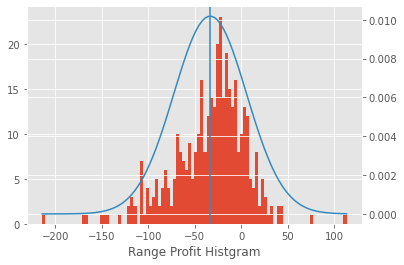

In [114]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_range['Profit'], bins=100, rwidth=1, )
ax.set_xlabel('Range Profit Histgram')

mu, sigma = DFAnalysdata_range['Profit'].mean(), DFAnalysdata_range['Profit'].std()

x = np.linspace(DFAnalysdata_range['Profit'].min(),DFAnalysdata_range['Profit'].max(),100)
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(x,y, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()

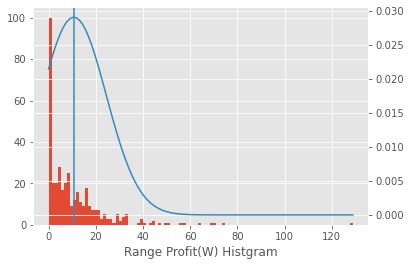

In [115]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_range['Profit(W)'], bins=100, rwidth=1, )
ax.set_xlabel('Range Profit(W) Histgram')

mu, sigma = DFAnalysdata_range['Profit(W)'].mean(), DFAnalysdata_range['Profit(W)'].std()

x = np.linspace(DFAnalysdata_range['Profit(W)'].min(),DFAnalysdata_range['Profit(W)'].max(),100)
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(x,y, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()

# Expansion相場の分析

In [13]:
DFAnalysdata_expansion = DFAnalysdata.loc[DFAnalysdata['ExpnLineage'] == "expansion"]

In [14]:
DFAnalysdata_expansion.head()

,Date,Week,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max),Date(Datetime),BeforeType,ExpansionType,AfterType,ExpnLineage
1,2010.01.04,Mon,24.4,24.4,0.0,1,1,0,1.000000,24.4000,24.40,0.000000,24.4,0,2010-01-04,range,expansion,squeeze,expansion
2,2010.01.05,Tue,-3.3,55.9,-59.2,6,2,4,0.333333,-0.5500,27.95,-14.800000,43.6,6,2010-01-05,squeeze,fake inverse expn,squeeze,expansion
3,2010.01.06,Wed,-23.5,37.2,-60.7,5,1,4,0.200000,-4.7000,37.20,-15.175000,37.2,11,2010-01-06,squeeze,expansion,range,expansion
4,2010.01.07,Thu,-6.1,40.3,-46.4,4,2,2,0.500000,-1.5250,20.15,-23.200000,38.8,14,2010-01-07,range,expansion,squeeze,expansion
5,2010.01.08,Fri,98.3,153.9,-55.6,8,1,7,0.125000,12.2875,153.90,-7.942857,153.9,23,2010-01-08,squeeze,range expn,squeeze,expansion


In [39]:
DFAnalysdata_expansion.describe().round(3)

,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max)
count,606.000,606.000,606.000,606.000,606.000,606.000,606.000,606.000,606.000,606.000,606.000,606.000
mean,12.775,40.612,-27.837,3.860,1.178,2.642,0.458,10.313,34.558,-9.235,5.046,9952.802
std,46.844,37.393,31.947,3.341,0.573,3.303,0.332,23.594,35.087,8.427,189.090,17352.453
min,-208.000,0.000,-233.800,0.000,0.000,0.000,0.000,-36.900,0.000,-50.825,-999.000,0.000
25%,-12.775,12.300,-39.275,2.000,1.000,0.000,0.200,-2.833,10.700,-12.846,11.700,2503.750
50%,10.700,32.800,-18.900,3.000,1.000,2.000,0.333,3.583,25.150,-8.358,31.200,6942.000
75%,37.000,56.375,0.000,5.000,1.000,3.000,0.667,16.000,47.000,0.000,53.875,12756.750
max,247.100,279.900,0.000,26.000,3.000,25.000,1.000,200.900,279.900,0.000,279.900,99999.000


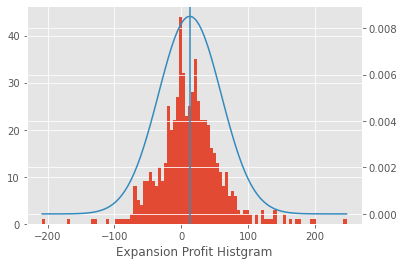

In [116]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_expansion['Profit'], bins=100, rwidth=1, )
ax.set_xlabel('Expansion Profit Histgram')

mu, sigma = DFAnalysdata_expansion['Profit'].mean(), DFAnalysdata_expansion['Profit'].std()

x = np.linspace(DFAnalysdata_expansion['Profit'].min(),DFAnalysdata_expansion['Profit'].max(),100)
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(x,y, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()

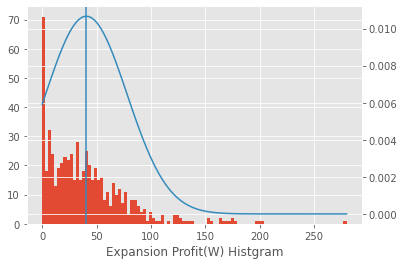

In [117]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_expansion['Profit(W)'], bins=100, rwidth=1, )
ax.set_xlabel('Expansion Profit(W) Histgram')

mu, sigma = DFAnalysdata_expansion['Profit(W)'].mean(), DFAnalysdata_expansion['Profit(W)'].std()

x = np.linspace(DFAnalysdata_expansion['Profit(W)'].min(),DFAnalysdata_expansion['Profit(W)'].max(),100)
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(x,y, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()

## Expn Range相場の分析

In [24]:
DFAnalysdata_expnrange = DFAnalysdata.query('ExpnLineage == "expn range"')

In [25]:
DFAnalysdata_expnrange.head()

,Date,Week,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max),Date(Datetime),BeforeType,ExpansionType,AfterType,ExpnLineage
8,2010.01.13,Wed,-23.4,38.0,-61.4,5,1,4,0.200000,-4.680000,38.00,-15.350000,38.0,36,2010-01-13,range,expn range,squeeze,expn range
9,2010.01.14,Thu,-31.2,15.8,-47.0,4,1,3,0.250000,-7.800000,15.80,-15.666667,15.8,40,2010-01-14,squeeze,expn range expn,range,expn range
14,2010.01.21,Thu,-95.3,22.2,-117.5,6,1,5,0.166667,-15.883333,22.20,-23.500000,22.2,55,2010-01-21,squeeze,expn inverse range,trend,expn range
18,2010.01.27,Wed,-1.1,25.5,-26.6,4,2,2,0.500000,-0.275000,12.75,-13.300000,13.7,76,2010-01-27,squeeze,fake expn range,range,expn range
25,2010.02.05,Fri,-41.9,64.7,-106.6,6,2,4,0.333333,-6.983333,32.35,-26.650000,50.4,106,2010-02-05,squeeze,expn range,range,expn range


In [110]:
DFAnalysdata_expnrange.describe().round(3)

,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max)
count,323.000,323.000,323.000,323.000,323.000,323.000,323.000,323.000,323.000,323.000,323.000,323.000
mean,-0.007,26.360,-26.367,3.827,1.238,2.560,0.445,4.130,20.770,-9.553,13.712,8727.155
std,35.488,25.344,24.485,2.698,0.591,2.682,0.309,16.205,19.037,7.251,100.690,10146.695
min,-108.200,0.000,-132.100,0.000,0.000,0.000,0.000,-53.600,0.000,-53.600,-999.000,36.000
25%,-19.450,9.900,-39.800,2.000,1.000,1.000,0.200,-4.175,8.192,-13.517,9.750,3356.500
50%,-1.400,18.900,-20.900,3.000,1.000,2.000,0.333,-0.383,14.600,-9.050,16.000,7832.000
75%,12.750,35.000,-9.300,5.000,2.000,4.000,0.667,6.410,27.850,-5.221,30.750,12967.500
max,189.600,189.600,0.000,21.000,3.000,20.000,1.000,94.800,108.800,0.000,108.800,99999.000


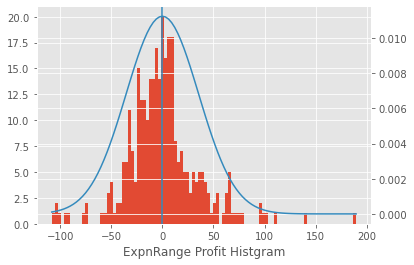

In [118]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_expnrange['Profit'], bins=100, rwidth=1, )
ax.set_xlabel('ExpnRange Profit Histgram')

mu, sigma = DFAnalysdata_expnrange['Profit'].mean(), DFAnalysdata_expnrange['Profit'].std()

x = np.linspace(DFAnalysdata_expnrange['Profit'].min(),DFAnalysdata_expnrange['Profit'].max(),100)
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(x,y, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()

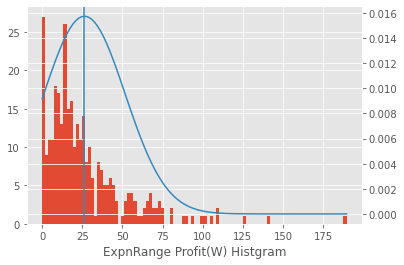

In [119]:
fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(DFAnalysdata_expnrange['Profit(W)'], bins=100, rwidth=1, )
ax.set_xlabel('ExpnRange Profit(W) Histgram')

mu, sigma = DFAnalysdata_expnrange['Profit(W)'].mean(), DFAnalysdata_expnrange['Profit(W)'].std()

x = np.linspace(DFAnalysdata_expnrange['Profit(W)'].min(),DFAnalysdata_expnrange['Profit(W)'].max(),100)
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))

ax2.plot(x,y, 'C1')

muline = list(range(40))
plt.axvline(x=mu, ymin=0, ymax=1, color= 'C1')

plt.show()

## 相場タイプ無しの分析

In [122]:
DFAnalysdata_typeNone = DFAnalysdata[DFAnalysdata['ExpnLineage'].isnull()]

In [123]:
DFAnalysdata_typeNone.head()

,Date,Week,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max),Date(Datetime),BeforeType,ExpansionType,AfterType,ExpnLineage
101,2010.05.24,Mon,162.6,162.6,0.0,2,1,0,0.5,81.3,162.6,0.0,162.6,363,2010-05-24,range,NaN,NaN,NaN
102,2010.05.25,Tue,36.9,36.9,0.0,1,1,0,1.0,36.9,36.9,0.0,36.9,364,2010-05-25,NaN,NaN,NaN,NaN
103,2010.05.26,Wed,18.6,48.4,-29.8,2,1,1,0.5,9.3,48.4,-29.8,48.4,366,2010-05-26,NaN,NaN,NaN,NaN
104,2010.05.27,Thu,61.6,61.6,0.0,2,2,0,1.0,30.8,30.8,0.0,61.2,368,2010-05-27,NaN,NaN,NaN,NaN
105,2010.05.28,Fri,-33.2,45.0,-78.2,4,2,2,0.5,-8.3,22.5,-39.1,26.3,372,2010-05-28,NaN,NaN,NaN,NaN


In [124]:
DFAnalysdata_typeNone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1944 entries, 101 to 3224
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1944 non-null   object        
 1   Week            1944 non-null   object        
 2   Profit          1944 non-null   float64       
 3   Profit(W)       1944 non-null   float64       
 4   Profit(L)       1944 non-null   float64       
 5   NumTrade        1944 non-null   int64         
 6   NumTrade(W)     1944 non-null   int64         
 7   NumTrade(L)     1944 non-null   int64         
 8   WinRate         1944 non-null   float64       
 9   ProfAve         1944 non-null   float64       
 10  ProfAve(W)      1944 non-null   float64       
 11  ProfAve(L)      1944 non-null   float64       
 12  Profit(Max)     1944 non-null   float64       
 13  NumTrade(Max)   1944 non-null   int64         
 14  Date(Datetime)  1944 non-null   datetime64[ns]
 15  Be

## 各相場のまとめ

In [136]:
GBAnalysdata_type = DFAnalysdata.groupby('ExpnLineage')

In [142]:
GBAnalysdata_type.mean().round(3)

,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max)
ExpnLineage,,,,,,,,,,,,
-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-999.000,99999.000
expansion,12.775,40.612,-27.837,3.860,1.178,2.642,0.458,10.313,34.558,-9.235,5.046,9952.802
expn range,-0.007,26.360,-26.367,3.827,1.238,2.560,0.445,4.130,20.770,-9.553,13.712,8727.155
range,-33.421,10.703,-44.123,5.560,1.096,4.409,0.294,-4.907,7.783,-11.140,2.522,8144.948


In [143]:
GBAnalysdata_type.std().round(3)

,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max)
ExpnLineage,,,,,,,,,,,,
-,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
expansion,46.844,37.393,31.947,3.341,0.573,3.303,0.332,23.594,35.087,8.427,189.090,17352.453
expn range,35.488,25.344,24.485,2.698,0.591,2.682,0.309,16.205,19.037,7.251,100.690,10146.695
range,39.179,13.721,33.860,3.786,0.718,3.961,0.267,8.602,9.003,7.720,73.856,8304.572


In [144]:
GBAnalysdata_type.sum().round(3)

,Profit,Profit(W),Profit(L),NumTrade,NumTrade(W),NumTrade(L),WinRate,ProfAve,ProfAve(W),ProfAve(L),Profit(Max),NumTrade(Max)
ExpnLineage,,,,,,,,,,,,
-,0.0,0.0,0.0,0,0,0,0.000,0.000,0.000,0.000,-8991.0,899991
expansion,7741.5,24610.9,-16869.4,2339,714,1601,277.637,6249.584,20942.067,-5596.362,3057.6,6031398
expn range,-2.1,8514.3,-8516.4,1236,400,827,143.766,1334.029,6708.683,-3085.585,4429.0,2818871
range,-12833.5,4109.8,-16943.3,2135,421,1693,112.910,-1884.450,2988.817,-4277.783,968.3,3127660


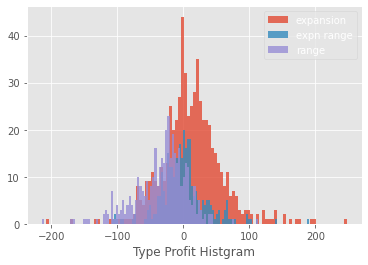

In [122]:
types = ['expansion', 'expn range', 'range']

fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)
ax.set_xlabel('Type Profit Histgram')

for t in types:
    ax.hist(DFAnalysdata.loc[DFAnalysdata['ExpnLineage'] == t, 'Profit'], bins=100, rwidth=1, alpha=0.8,label=t)
    

ax.legend()

plt.show()

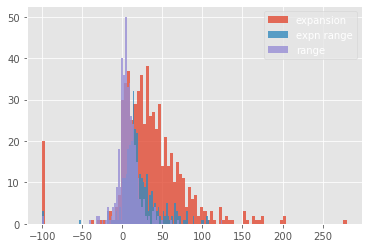

In [77]:
types = ['expansion', 'expn range', 'range']

fig = plt.figure()
plt.style.use('ggplot')

ax = fig.add_subplot(111)


for t in types:
    ax.hist(DFAnalysdata.loc[DFAnalysdata['ExpnLineage'] == t, 'Profit(Max)'], bins=100, rwidth=1, alpha=0.8,label=t)
    

ax.legend()

plt.show()